In [1]:
import math


In [2]:

import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Taking range of temperature

In [3]:
T = [5000, 15000, 25000]

In [26]:

x_1 = 4000
x_2 = 25000
T=np.arange(start=x_1, stop=x_2, step=500)
T

array([ 4000,  4500,  5000,  5500,  6000,  6500,  7000,  7500,  8000,
        8500,  9000,  9500, 10000, 10500, 11000, 11500, 12000, 12500,
       13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000,
       17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500,
       22000, 22500, 23000, 23500, 24000, 24500])

In [27]:
g= pd.DataFrame(data = T)
g

,0
0,4000
1,4500
2,5000
3,5500
4,6000
5,6500
6,7000
7,7500
8,8000
9,8500


In [28]:
g.columns=["T(in Kelvin)"]
g

,T(in Kelvin)
0,4000
1,4500
2,5000
3,5500
4,6000
5,6500
6,7000
7,7500
8,8000
9,8500


Compute N11/N1 using saha equation

In [29]:
K= 1.380649*(math.pow(10, -23))
K # boltzmann constant in J per kelvin

1.380649e-23

In [30]:
k = 8.617333262*(math.pow(10, -5))
k # boltzmann constant in ev per Kelvin

8.617333262000001e-05

Computing saha equation first term

In [31]:
s_1 = (4*K)/(20)
s_1


2.7612980000000003e-24

In [32]:
m_e =9.10938*(math.pow(10, -31))
m_e # rest mass of electron

9.10938e-31

In [33]:
h =6.62607015*(math.pow(10, -34)) # planck's constant in J/second
h_1 = math.pow(h, 2) # sqaure of planck's constant
h_1

4.390480563272102e-67

Computing saha equation second term

In [34]:
s = (2*math.pi*m_e*K)/(h_1)
s_2 = math.pow(s, 1.5)
s_2

2.414681567801428e+21

Computing saha equation third part(exponential)

In [35]:
s_3 = 24.6/k
s_3

285471.1457949414

In [36]:
g["N2/N_1"]= s_1*s_2*(np.power(g["T(in Kelvin)"],2.5))*(np.exp(-s_3/g["T(in Kelvin)"]))

In [37]:
g

,T(in Kelvin),N2/N_1
0,4000,6.831047e-25
1,4500,2.548103e-21
2,5000,1.886642e-18
3,5500,4.298595e-16
4,6000,4.038878e-14
5,6500,1.917055e-12
6,7000,5.314933e-11
7,7500,9.575332e-10
8,8000,1.214452e-08
9,8500,1.152947e-07


Text(0.5, 0, 'Temperature in Kelvin')

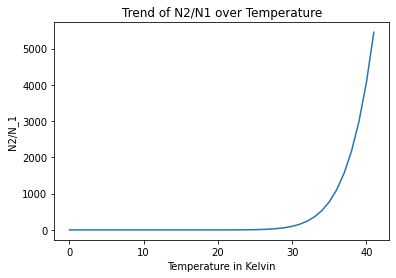

In [38]:

plt.title("Trend of N2/N1 over Temperature")
sns.lineplot(data= g["N2/N_1"])
plt.xlabel("Temperature in Kelvin")

Computing N_3/N_1

In [39]:
p_1 = (2*1*K)/(20* 2)
p_1 # computing first term of saha equation

6.903245000000001e-25

In [40]:
p_3 =54.4/(k)
p_3

631285.7858229597

In [41]:
g["N3/N_2"]= p_1*s_2*(np.power(g["T(in Kelvin)"],2.5))*(np.exp(-p_3/g["T(in Kelvin)"]))

In [42]:
g

,T(in Kelvin),N2/N_1,N3/N_2
0,4000,6.831047e-25,4.853777e-63
1,4500,2.548103e-21,2.689218e-55
2,5000,1.886642e-18,4.330634e-49
3,5500,4.298595e-16,5.306791e-44
4,6000,4.038878e-14,9.403779e-40
5,6500,1.917055e-12,3.759498e-36
6,7000,5.314933e-11,4.659959e-33
7,7500,9.575332e-10,2.261389e-30
8,8000,1.214452e-08,5.118544e-28
9,8500,1.152947e-07,6.178458e-26


Text(0.5, 0, 'Temperature in Kelvin')

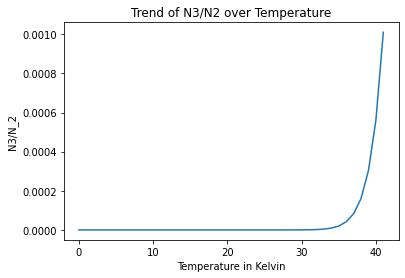

In [43]:
plt.title("Trend of N3/N2 over Temperature")
sns.lineplot(data= g["N3/N_2"])
plt.xlabel("Temperature in Kelvin")

In [44]:
g["x"] = (1+ (np.power(g["N2/N_1"], -1)))

In [45]:
g["N_2/N_t"]= 1/(g["x"]+ g["N3/N_2"])

In [46]:
g

,T(in Kelvin),N2/N_1,N3/N_2,x,N_2/N_t
0,4000,6.831047e-25,4.853777e-63,1.463904e+24,6.831047e-25
1,4500,2.548103e-21,2.689218e-55,3.924488e+20,2.548103e-21
2,5000,1.886642e-18,4.330634e-49,5.300423e+17,1.886642e-18
3,5500,4.298595e-16,5.306791e-44,2.326342e+15,4.298595e-16
4,6000,4.038878e-14,9.403779e-40,2.475935e+13,4.038878e-14
5,6500,1.917055e-12,3.759498e-36,5.216336e+11,1.917055e-12
6,7000,5.314933e-11,4.659959e-33,1.881491e+10,5.314933e-11
7,7500,9.575332e-10,2.261389e-30,1.044350e+09,9.575332e-10
8,8000,1.214452e-08,5.118544e-28,8.234170e+07,1.214452e-08
9,8500,1.152947e-07,6.178458e-26,8.673424e+06,1.152947e-07


Text(0.5, 0, 'Temperature in Kelvin')

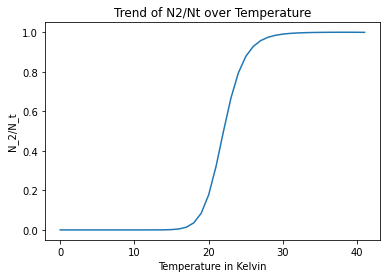

In [49]:
plt.title("Trend of N2/Nt over Temperature")
sns.lineplot(data= g["N_2/N_t"])
plt.xlabel("Temperature in Kelvin")

Text(0.5, 1.0, 'Trends of NII/N_t over Temperature')

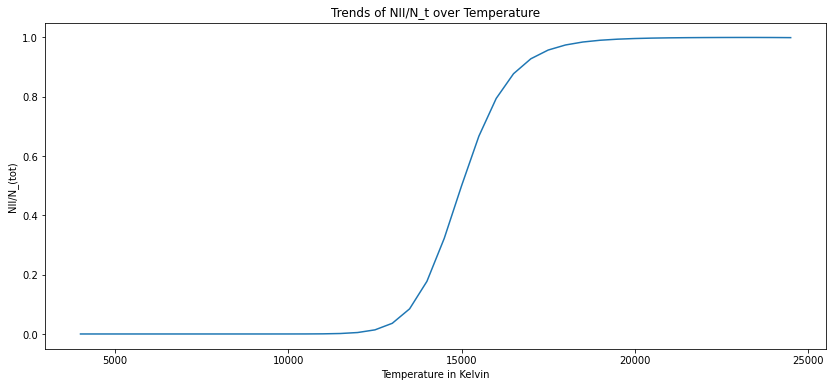

In [59]:
plt.figure(figsize =(14,6))
x = g["T(in Kelvin)"]
y = g["N_2/N_t"]
plt.plot(x, y)
plt.xlabel("Temperature in Kelvin")
plt.ylabel("NII/N_(tot)")
plt.title("Trends of NII/N_t over Temperature")


Finding the Temperature at which NII/ N_t equal to 0.5

In [57]:
g[g["N_2/N_t"]<0.5].max()

T(in Kelvin)    1.500000e+04
N2/N_1          9.976198e-01
N3/N_2          2.424073e-11
x               1.463904e+24
N_2/N_t         4.994042e-01
dtype: float64